In [28]:
#Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [29]:
#Step 2: Loading the dataset
df = pd.read_csv('Medical_insurance.csv')
print("First 5 rows of the dataset:")
print(df.head())
print("\nDataset Information:")
df.info()
print("\nChecking for missing values:")
print(df.isnull().sum())
print("\nStatistical Summary:")
print(df.describe())

First 5 rows of the dataset:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB

Checking for missing values:
age         0


--- Performing EDA ---


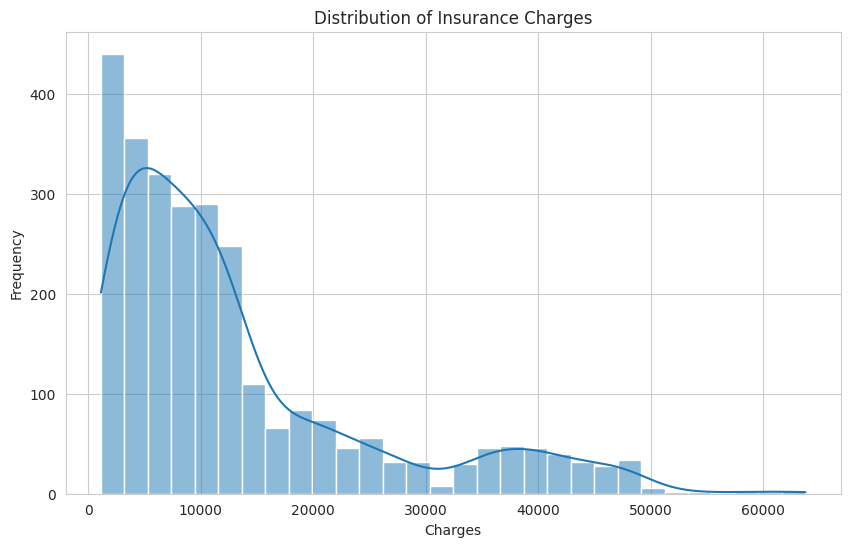

In [30]:
#Step 3: Performing Exploratory Data Analysis (EDA)
print("--- Performing EDA ---")
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.histplot(df['charges'], kde=True, bins=30)
plt.title('Distribution of Insurance Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.savefig('eda_charges_distribution.png')
plt.show()

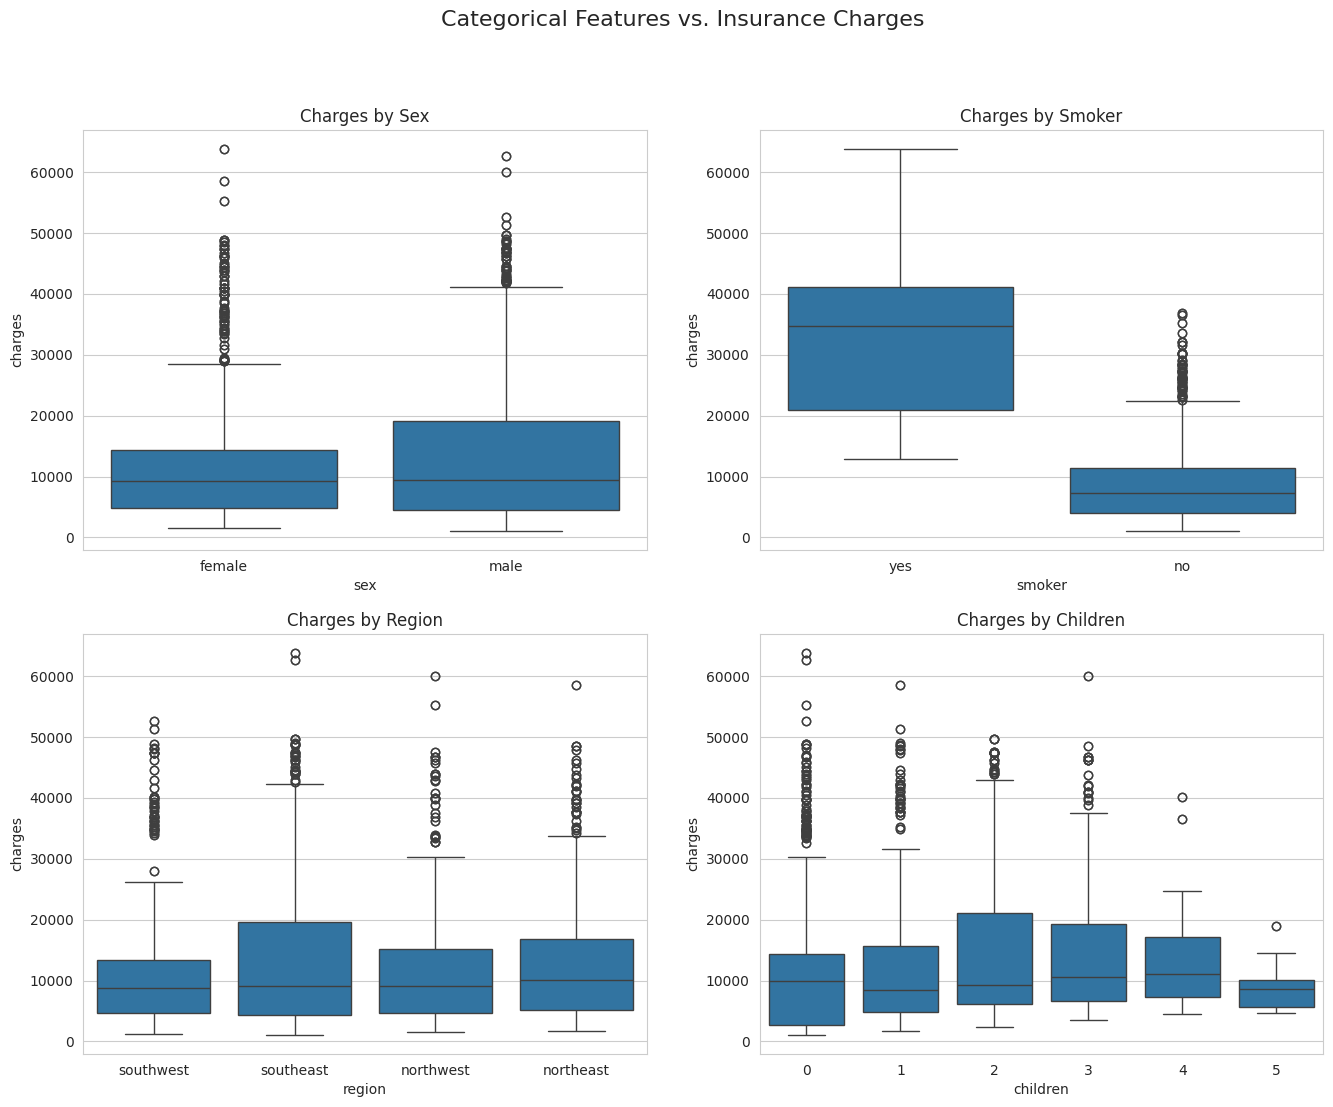

In [31]:
#Step 3.1: Find the relationship between categorical features and charges
categorical_features = ['sex', 'smoker', 'region', 'children']
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Categorical Features vs. Insurance Charges', fontsize=16)
for i, feature in enumerate(categorical_features):
    row, col = i // 2, i % 2
    sns.boxplot(x=feature, y='charges', data=df, ax=axes[row, col])
    axes[row, col].set_title(f'Charges by {feature.capitalize()}')
plt.savefig('eda_categorical_vs_charges.png')
plt.show()

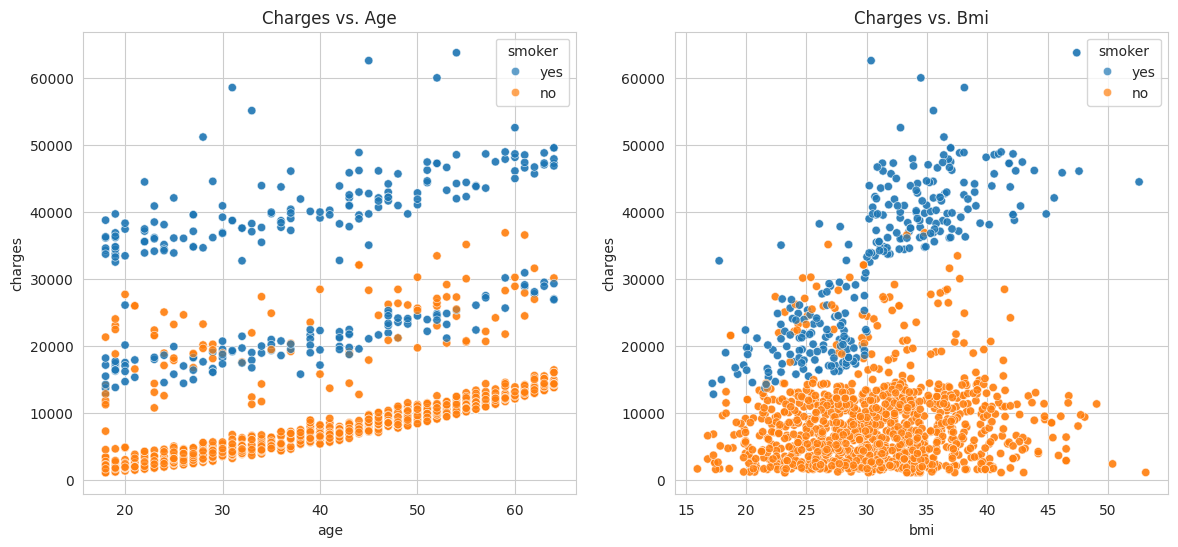

In [32]:
#Step 3.2: Relationship between numerical features and charges
numerical_features = ['age', 'bmi']
plt.figure(figsize=(14, 6))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, 2, i)
    sns.scatterplot(x=feature, y='charges', data=df, hue='smoker', alpha=0.7)
    plt.title(f'Charges vs. {feature.capitalize()}')
plt.savefig('eda_numerical_vs_charges.png')
plt.show()

In [33]:
#Step 4: Data Preprocessing
print("--- Preprocessing Data ---")
X = df.drop('charges', axis=1)
y = df['charges']

--- Preprocessing Data ---


In [34]:
#Step 4.1: Identify categorical and numerical features
categorical_cols = ['sex', 'smoker', 'region', 'children']
numerical_cols = ['age', 'bmi']

In [35]:
#Step 4.2: Create a preprocessor using ColumnTransformer (OneHotEncoder for categorical data, StandardScaler for numerical data)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

In [36]:
#Step 4.3: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 2217 samples
Test set size: 555 samples


In [37]:
#Step 5: Model Training & Evaluation
#Step 5.1.1: Model 1: Linear Regression
results = {}
models = {}
name = "Linear Regression"
model = LinearRegression()
models[name] = model
print(f"--- Training: {name} ---")
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', model)])
lr_pipeline.fit(X_train, y_train)
y_pred = lr_pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
results[name] = {'R-squared': r2, 'MAE': mae, 'RMSE': rmse}
print(f"R-squared: {r2:.4f} \nMAE: ${mae:,.2f} \nRMSE: ${rmse:,.2f}")

--- Training: Linear Regression ---
R-squared: 0.7421 
MAE: $4,154.27 
RMSE: $6,291.78


In [38]:
#Step 5.1.2: Model 2: Decision Tree
name = "Decision Tree"
model = DecisionTreeRegressor(random_state=42)
models[name] = model
print(f"--- Training: {name} ---")
dt_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', model)])
dt_pipeline.fit(X_train, y_train)
y_pred = dt_pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
results[name] = {'R-squared': r2, 'MAE': mae, 'RMSE': rmse}
print(f"R-squared: {r2:.4f} \nMAE: ${mae:,.2f} \nRMSE: ${rmse:,.2f}")

--- Training: Decision Tree ---
R-squared: 0.9423 
MAE: $661.35 
RMSE: $2,975.09


In [39]:
#Step 5.1.3: Model 3: Random Forest
name = "Random Forest"
model = RandomForestRegressor(random_state=42)
models[name] = model
print(f"--- Training: {name} ---")
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', model)])
rf_pipeline.fit(X_train, y_train)
y_pred = rf_pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
results[name] = {'R-squared': r2, 'MAE': mae, 'RMSE': rmse}
print(f"R-squared: {r2:.4f} \nMAE: ${mae:,.2f} \nRMSE: ${rmse:,.2f}")

--- Training: Random Forest ---
R-squared: 0.9529 
MAE: $1,288.48 
RMSE: $2,689.79


In [40]:
#Step 5.1.4: Model 4: Gradient Boosting
name = "Gradient Boosting"
model = GradientBoostingRegressor(random_state=42)
models[name] = model
print(f"--- Training: {name} ---")
gb_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', model)])
gb_pipeline.fit(X_train, y_train)
y_pred = gb_pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
results[name] = {'R-squared': r2, 'MAE': mae, 'RMSE': rmse}
print(f"R-squared: {r2:.4f} \nMAE: ${mae:,.2f} \nRMSE: ${rmse:,.2f}")

--- Training: Gradient Boosting ---
R-squared: 0.8731 
MAE: $2,301.33 
RMSE: $4,412.50


In [42]:
#Step 6: Final Model Comparison
print("--- Final Model Comparison ---")
#Step 6.1: Convert results to a DataFrame for easy viewing
results_df = pd.DataFrame(results).T.sort_values(by='R-squared', ascending=False)
print(results_df)

--- Final Model Comparison ---
                   R-squared          MAE         RMSE
Random Forest       0.952861  1288.484962  2689.785842
Decision Tree       0.942330   661.347931  2975.094980
Gradient Boosting   0.873143  2301.329826  4412.504569
Linear Regression   0.742076  4154.268492  6291.777248


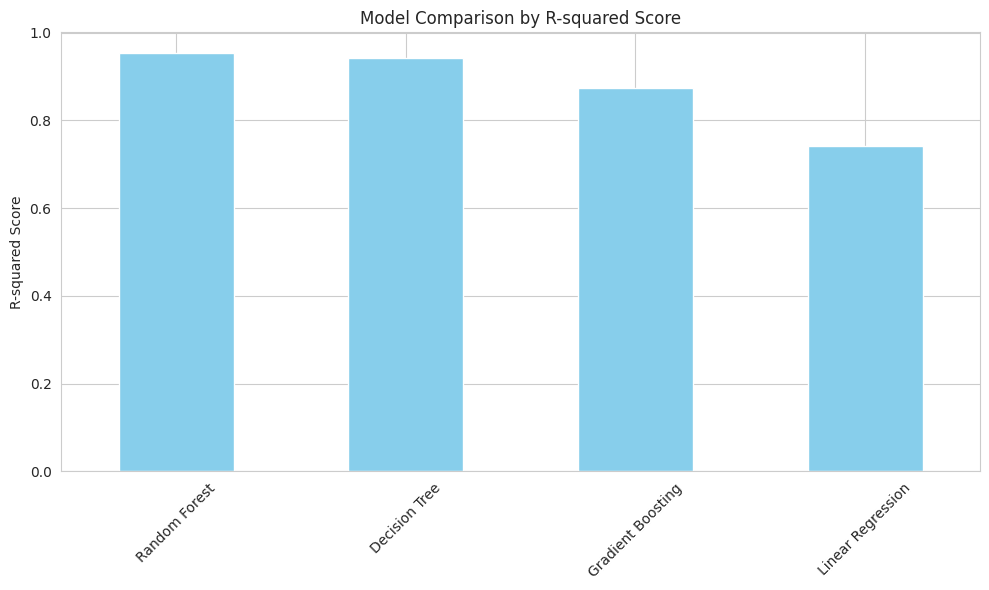

In [43]:
#Step 6.2: Visualize the results
results_df['R-squared'].plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Model Comparison by R-squared Score')
plt.ylabel('R-squared Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('model_comparison.png')
plt.show()
plt.close()

In [44]:
#Step 7: Predicting the best model
best_model_name = results_df.index[0]
best_model_score = results_df.loc[best_model_name]
print(f"The best performing model is '{best_model_name}' with the following scores:")
print(best_model_score)
print("\nThis model is recommended for predicting medical insurance prices.")

The best performing model is 'Random Forest' with the following scores:
R-squared       0.952861
MAE          1288.484962
RMSE         2689.785842
Name: Random Forest, dtype: float64

This model is recommended for predicting medical insurance prices.


In [45]:
#Step 8: Predict the charges for a new patient
#Step 8.1: Retrain the Best Model on the Full Dataset ---
best_model_name = results_df.index[0]
best_model = models[best_model_name]
#Step 8.2: Create the final pipeline object
final_pipeline = Pipeline(steps=[('preprocessor', preprocessor),('regressor', best_model)])
#Step 8.3: Train it on ALL the data (X, y)
final_pipeline.fit(X, y)
print(f"Final model ('{best_model_name}') is trained and ready.")

Final model ('Random Forest') is trained and ready.


In [46]:
#Step 8.4: Enter New Patient Details ---
print("--- Enter New Patient Details ---")
#Step 8.5: Get user input and create a DataFrame
age = int(input("Enter age: "))
sex = input("Enter sex (male/female): ").lower()
height_m = float(input("Enter height in meters (e.g., 1.75): "))
weight_kg = float(input("Enter weight in kilograms (e.g., 70): "))
#Step 8.5.1: Calculate and print BMI immediately
bmi = weight_kg / (height_m ** 2)
print(f"Your calculated BMI is: {bmi:.2f}")
children = int(input("Enter number of children: "))
smoker = input("Are you a smoker? (yes/no): ").lower()
region = input("Enter region (e.g., southwest): ").lower()
#Step 8.5.2: Create a DataFrame with all the collected data
new_patient_data = pd.DataFrame({
    'age': [age],
    'sex': [sex],
    'bmi': [bmi],
    'children': [children],
    'smoker': [smoker],
    'region': [region]
})
#Step 8.6: Predict the charge using the final model
predicted_charge = final_pipeline.predict(new_patient_data)[0]
#Step 9: Display the final result
print(f"Predicted Insurance Charge: ${predicted_charge:,.2f}")

--- Enter New Patient Details ---
Enter age: 19
Enter sex (male/female): female
Enter height in meters (e.g., 1.75): 1.70
Enter weight in kilograms (e.g., 70): 80.5
Your calculated BMI is: 27.85
Enter number of children: 0
Are you a smoker? (yes/no): yes
Enter region (e.g., southwest): southwest
Predicted Insurance Charge: $16,894.67
